In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns

In [61]:
df = pd.read_csv("D:\\Default_On_Payment.csv", sep = ",")
default = df.dropna(how='any')

C:\Users\Raceclass59\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
default.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015.0,A14,27,A32,A40,2570,A61,A73,3.0,A92,...,A121,21.0,A143,A151,1.0,A173,1.0,A191,A201,1.0
1,100031.0,A11,12,A34,A43,385,A61,A74,4.0,A92,...,A121,58.0,A143,A152,4.0,A172,1.0,A192,A201,0.0
2,100046.0,A12,13,A34,A43,882,A61,A72,4.0,A93,...,A121,23.0,A143,A152,2.0,A173,1.0,A191,A201,0.0
3,100103.0,A14,24,A32,A40,1393,A61,A73,2.0,A93,...,A121,31.0,A143,A152,1.0,A173,1.0,A192,A201,0.0
4,100104.0,A11,24,A32,A40,3123,A61,A72,4.0,A92,...,A122,27.0,A143,A152,1.0,A173,1.0,A191,A201,1.0


In [63]:
for col in default.columns:
    if default[col].dtype == 'object':
        default[col] = pd.Categorical(default[col]).codes

C:\Users\Raceclass59\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
default.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015.0,3,19,2,0,483,0,2,3.0,1,...,0,21.0,2,0,1.0,2,1.0,0,0,1.0
1,100031.0,0,8,4,4,7,0,3,4.0,1,...,0,58.0,2,1,4.0,1,1.0,1,0,0.0
2,100046.0,1,9,4,4,77,0,1,4.0,2,...,0,23.0,2,1,2.0,2,1.0,0,0,0.0
3,100103.0,3,17,2,0,230,0,2,2.0,2,...,0,31.0,2,1,1.0,2,1.0,1,0,0.0
4,100104.0,0,17,2,0,574,0,1,4.0,1,...,1,27.0,2,1,1.0,2,1.0,0,0,1.0


In [65]:
default.info()
default.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 40119
Data columns (total 22 columns):
Customer_ID                    40119 non-null float64
Status_Checking_Acc            40119 non-null int8
Duration_in_Months             40119 non-null int8
Credit_History                 40119 non-null int8
Purposre_Credit_Taken          40119 non-null int8
Credit_Amount                  40119 non-null int16
Savings_Acc                    40119 non-null int8
Years_At_Present_Employment    40119 non-null int8
Inst_Rt_Income                 40119 non-null float64
Marital_Status_Gender          40119 non-null int8
Other_Debtors_Guarantors       40119 non-null int8
Current_Address_Yrs            40119 non-null float64
Property                       40119 non-null int8
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null int8
Housing                        40119 non-null int8
Num_CC                         40119 non-null float64
Job     

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [66]:
x = default[['Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker']]

y = default['Default_On_Payment']
       
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

pandas.core.frame.DataFrame

In [67]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [68]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
log.coef_

array([[ -5.93565203e-01,   2.16226403e-02,  -4.04446064e-01,
         -2.10261268e-02,  -4.13092321e-04,  -2.05455857e-01,
         -1.61231281e-01,   1.93556708e-01,  -2.19990756e-01,
         -2.98899134e-01,   2.77174459e-03,   3.10507243e-01,
         -8.64686601e-03,  -2.90498296e-01,  -2.47099466e-01,
          2.84417500e-01,   8.64657935e-02,   1.23319901e-01,
         -1.62309065e-01,  -1.21708486e+00]])

In [70]:
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ("Variable","Coeff")
coeff.sort_values('Variable', ascending=True)

,Variable,Coeff
12,Age,-0.008647
4,Credit_Amount,-0.000413
2,Credit_History,-0.404446
10,Current_Address_Yrs,0.002772
17,Dependents,0.123320
1,Duration_in_Months,0.021623
19,Foreign_Worker,-1.217085
14,Housing,-0.247099
7,Inst_Rt_Income,0.193557
16,Job,0.086466


In [71]:
classes = log.predict(test_x)
print(classes.size)
print('Positive Cases in test data:', test_y[test_y == 1].shape[0])
print('Negative Cases in test data:', test_y[test_y == 0].shape[0])

10030
Positive Cases in test data: 2999
Negative Cases in test data: 7031


In [72]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.767796610169
Precision/Recall Metrics
             precision    recall  f1-score   support

        0.0       0.80      0.90      0.84      7031
        1.0       0.66      0.46      0.54      2999

avg / total       0.76      0.77      0.75     10030

AUC


0.68006405112328494

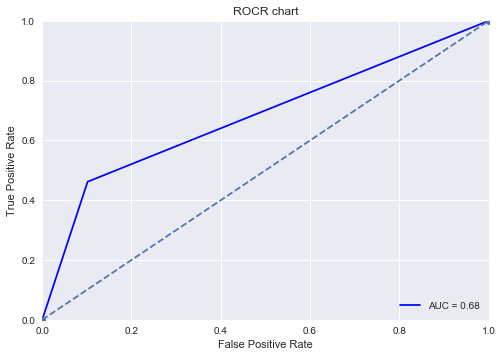

In [73]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROCR chart')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


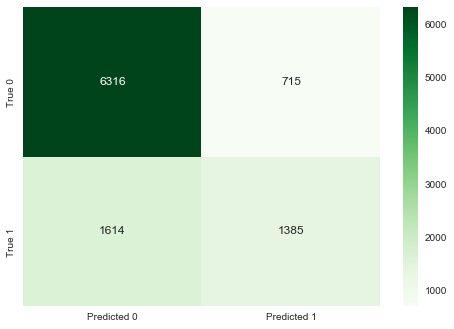

In [74]:
#Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y,classes)
lbl1 = ['Predicted 0','Predicted 1']
lbl2 = ['True 0','True 1']
sns.heatmap(cf, annot=True, cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();